In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
temp_df     =pd.read_csv("Resources/CA avg temps 2000-2020.csv")
precip_df   =pd.read_csv("Resources/CA total precip 2000-2020.csv")
beefprod_df = pd.read_csv( "Resources/CA beef production 2000-2020.csv")


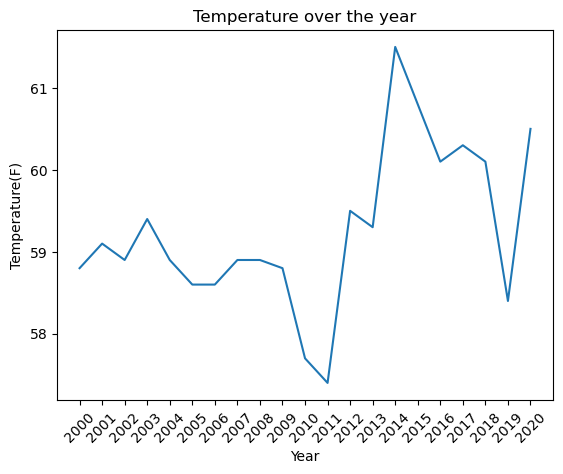

In [30]:
temp_df["Year"]=temp_df["Year"].astype(str)

#trend in temperature
x_values=temp_df["Year"]
y_values=temp_df["Avg Temp"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Temperature over the year")
plt.xlabel("Year")
plt.ylabel("Temperature(F)")
plt.savefig("Output/trend in temperature")
plt.show()

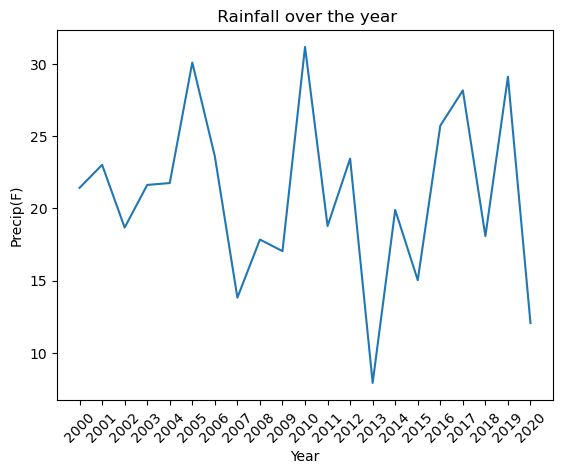

In [34]:
precip_df["Year"]=precip_df["Year"].astype(str)

#trend in rainfall
x_values=precip_df["Year"]
y_values=precip_df["Total Precip"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title(" Rainfall over the year")
plt.xlabel("Year")
plt.ylabel("Precip(F)")
plt.savefig("Output/trend in rainfall")
plt.show()

In [ ]:
#clean beef dataframe

beefprod_df["beef prod(Billion LB)"]=beefprod_df["beef production in LB"].str.replace(",","").astype(float)/1000000000
beefprod_df["beef prod(Billion LB)"]=round(beefprod_df["beef prod(Billion LB)"],2)
beefprod_df["Year"]=beefprod_df["Year"].astype(str)

In [4]:
beefprod_df

,Year,beef production in LB,beef prod(Billion LB)
0,2000,"1,923,165,000",1.92
1,2001,"1,992,529,000",1.99
2,2002,"1,832,884,000",1.83
3,2003,"1,987,446,000",1.99
4,2004,"1,982,875,000",1.98
5,2005,"1,926,565,000",1.93
6,2006,"1,994,084,000",1.99
7,2007,"1,976,564,000",1.98
8,2008,"1,995,264,000",2.00
9,2009,"1,896,641,000",1.90


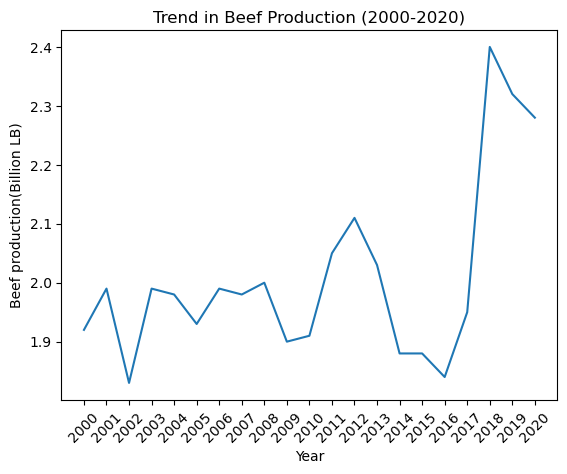

In [15]:
#trend in beef production 
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod(Billion LB)"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Trend in Beef Production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production(Billion LB)")
plt.savefig("Output/trend in beef production")
plt.show()

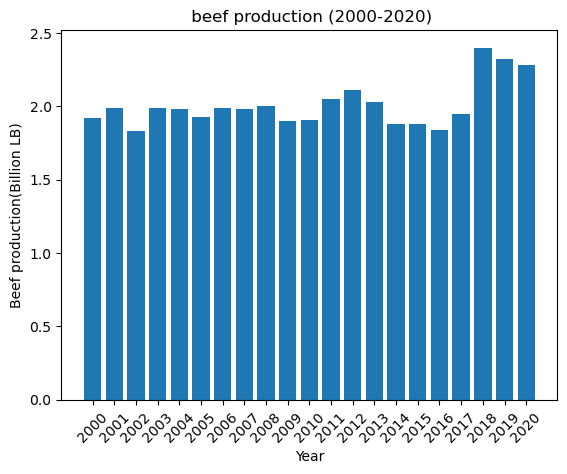

In [25]:
#beef production by  year
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod(Billion LB)"]
plt.bar(x_values,y_values)
plt.xticks(rotation=45)
plt.title(" beef production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production(Billion LB)")
plt.savefig("Output/Beef Production by year")
plt.show()

The r value is :-0.12


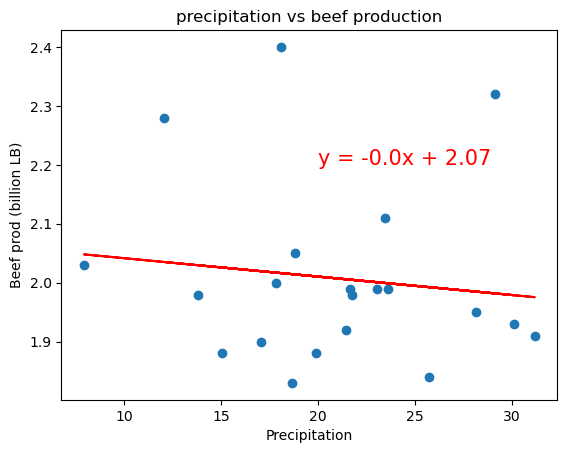

In [23]:
#Scatter plot
x_values = precip_df ["Total Precip"]
y_values=beefprod_df["beef prod(Billion LB)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2.2),fontsize=15,color="red")
plt.xlabel("Precipitation")
plt.ylabel("Beef prod (billion LB)")
plt.title("precipitation vs beef production")
print(f"The r value is :{round(rvalue,2)}")
plt.show()